###################################
##    뉴스 기사 워드 클라우드   ##
###################################

0. 라이브러리 임포트

In [149]:
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

1. 뉴스 기사 제목 500개 크롤링

In [150]:
query = '메가커피'
page = 0
title_list = []

# User-Agent 설정
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'ko-KR,ko;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive'
}

for i in range(0, 50):
    page += 1
    url = f'https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q={query}&p={page}&sort=recency'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        title_elements = soup.find_all(class_='tit-g clamp-g')
        for title_element in title_elements:
            title_list.append(title_element.get_text())
    else:
        print("웹 페이지를 가져오는 데 실패했습니다.")

print(title_list)
print(len(title_list))

['  컴포즈커피로 4700억 대박낸 양재석…그가 점찍은 다음 회사는  ', '  "욜로족? 대세는 요노족"…1000원짜리 맥주·과자 쏟아진다  ', '  필리핀 1위 식품 기업, 한국으로 커피 영토 확장한 까닭은?  ', "  80억 청담 아파트 주민도 못 먹는 '한잔 140만원 커피' 마셔봤다  ", '  “적자 폭 줄였다”…SAMG엔터, 2분기 실적 개선 수익성 제고 집중  ', '  유통가, 지역서 제품 발굴 ‘로코노미’ 내놨다하면 불티...열풍 이유있다  ', '  "근처 아파트 70~80억원"…\'원두 140만원짜리\' 커피, 맛보니  ', '  커피 한잔에 48만원?…‘커피계의 에르메스’ 국내 진출, 처음 맛본 유튜버의 ‘솔직’ 평가는  ', '  "적자 폭 줄였다!" SAMG엔터 2분기 영업손실 약 37% 감소  ', '  "생전 처음 맡아보는 냄새"…\'100g에 140만원\' 럭셔리 커피 마셔본 소감은  ', "  삼성스토어, 8월 ‘AI 라이프 혼수·이사 박람회' 개최  ", '  혼수‧이사 준비도 삼성스토어에서… 삼성스토어, 8월 ‘AI 라이프 혼수‧이사 박람회’ 개최  ', "  삼성스토어, 8월 ‘AI 라이프 혼수‧이사 박람회' 개최  ", "  삼성스토어, 8월 'AI 라이프 혼수·이사 박람회' 개최  ", "  [오늘의신상]세븐일레븐이 품은 '하정우 와인' 外  ", '  ‘140만원’ 커피, 맛 어떻길래…보겸 “메가커피 옅은 맛인데?”  ', '  “청담 주민도 안 사먹어”... ‘원두 140만원짜리’ 커피, 맛보니  ', '  iM증권, 사명 변경 기념 대고객 이벤트 진행  ', '  ‘140만원 커피’ 누가 사먹나 했더니… ‘첫 손님’ 보겸 “메가커피 옅은 맛”  ', '  iM증권, 사명 변경 기념 대고객 이벤트 진행  ', '  iM증권, 사명 변경 기념 고객 이벤트 진행…내달까지  ', '  iM증권, 사명 변경 기념 대고객 이벤트 진행  ', "  iM증권, 사명 변경 기념 '서비스 개선 아이디어 공모' 이벤트  ", 

2. 뉴스 기사 제목 전처리

In [151]:
pattern = r'[^a-zA-Z0-9\u4e00-\u9fff가-힣\s.%]'
regex_title = [re.sub(pattern, '', title) for title in title_list]
print(regex_title)

['  컴포즈커피로 4700억 대박낸 양재석그가 점찍은 다음 회사는  ', '  욜로족 대세는 요노족1000원짜리 맥주과자 쏟아진다  ', '  필리핀 1위 식품 기업 한국으로 커피 영토 확장한 까닭은  ', '  80억 청담 아파트 주민도 못 먹는 한잔 140만원 커피 마셔봤다  ', '  적자 폭 줄였다SAMG엔터 2분기 실적 개선 수익성 제고 집중  ', '  유통가 지역서 제품 발굴 로코노미 내놨다하면 불티...열풍 이유있다  ', '  근처 아파트 7080억원원두 140만원짜리 커피 맛보니  ', '  커피 한잔에 48만원커피계의 에르메스 국내 진출 처음 맛본 유튜버의 솔직 평가는  ', '  적자 폭 줄였다 SAMG엔터 2분기 영업손실 약 37% 감소  ', '  생전 처음 맡아보는 냄새100g에 140만원 럭셔리 커피 마셔본 소감은  ', '  삼성스토어 8월 AI 라이프 혼수이사 박람회 개최  ', '  혼수이사 준비도 삼성스토어에서 삼성스토어 8월 AI 라이프 혼수이사 박람회 개최  ', '  삼성스토어 8월 AI 라이프 혼수이사 박람회 개최  ', '  삼성스토어 8월 AI 라이프 혼수이사 박람회 개최  ', '  오늘의신상세븐일레븐이 품은 하정우 와인 外  ', '  140만원 커피 맛 어떻길래보겸 메가커피 옅은 맛인데  ', '  청담 주민도 안 사먹어... 원두 140만원짜리 커피 맛보니  ', '  iM증권 사명 변경 기념 대고객 이벤트 진행  ', '  140만원 커피 누가 사먹나 했더니 첫 손님 보겸 메가커피 옅은 맛  ', '  iM증권 사명 변경 기념 대고객 이벤트 진행  ', '  iM증권 사명 변경 기념 고객 이벤트 진행내달까지  ', '  iM증권 사명 변경 기념 대고객 이벤트 진행  ', '  iM증권 사명 변경 기념 서비스 개선 아이디어 공모 이벤트  ', '  iM증권 사명 변경 기념 대고객 이벤트 진행  ', '  메가커피 게임 원신 협업 메뉴제품 15일새 60만개 판매  ', '  메가MGC커피 원신 콜라보 출시 

3. 형태소 분석

In [152]:
okt = Okt()

nouns_list = []
for title in regex_title:
  nouns = okt.nouns(title)
  english_nouns = re.findall(r'[a-zA-Z]+', title)
  
  nouns_list.extend(nouns)
  nouns_list.extend(english_nouns)

nouns_list = [noun for noun in nouns_list if len(noun) >= 2 and noun != query]    

print(nouns_list)

['포즈', '커피', '대박', '양재석', '다음', '회사', '욜로족', '대세', '노족', '맥주', '과자', '필리핀', '식품', '기업', '한국', '커피', '영토', '확장', '까닭', '청담', '아파트', '주민', '한잔', '커피', '적자', '엔터', '실적', '개선', '수익', '집중', 'SAMG', '유통', '지역', '제품', '발굴', '로코', '노미', '불티', '열풍', '이유', '근처', '아파트', '커피', '커피', '한잔', '에르메스', '국내', '진출', '처음', '유튜버', '솔직', '평가', '적자', '엔터', '영업', '손실', '감소', 'SAMG', '생전', '처음', '냄새', '럭셔리', '커피', '소감', '삼성', '스토어', '라이프', '혼수', '이사', '박람회', '개최', 'AI', '혼수', '이사', '준비', '스토어', '삼성', '스토어', '라이프', '혼수', '이사', '박람회', '개최', 'AI', '삼성', '스토어', '라이프', '혼수', '이사', '박람회', '개최', 'AI', '삼성', '스토어', '라이프', '혼수', '이사', '박람회', '개최', 'AI', '오늘', '신상', '세븐일레븐', '하정우', '와인', '커피', '보겸', '커피', '청담', '주민', '원두', '커피', '증권', '사명', '변경', '기념', '고객', '이벤트', '진행', 'iM', '커피', '누가', '손님', '보겸', '커피', '증권', '사명', '변경', '기념', '고객', '이벤트', '진행', 'iM', '증권', '사명', '변경', '기념', '고객', '이벤트', '진행', '내달', 'iM', '증권', '사명', '변경', '기념', '고객', '이벤트', '진행', 'iM', '증권', '사명', '변경', '기념', '서비스', '개선', '아이디어', '공모', '이벤트', 'iM', '

4. Word Cloud

'메가커피'의 TOP5 연관 검색어 : 커피, 저가 커피, 포즈 커피, 커피 필리핀, MGC


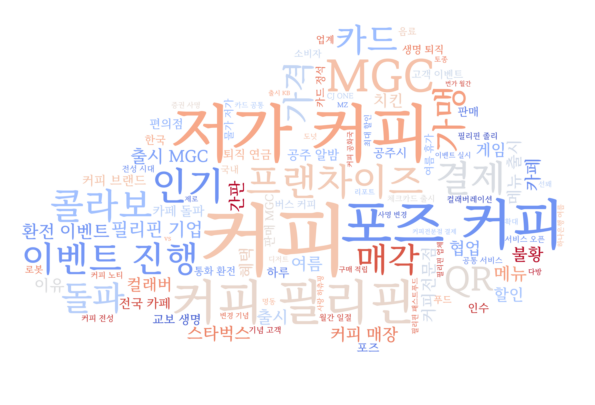

In [159]:
text = ' '.join(nouns_list)
image_mask = np.array(Image.open('D:/TJ_FInal_Project/KDJ/Word_cloud/image/cloud_mask.png'))
image_mask = 255 - image_mask

wordcloud = WordCloud(font_path='D:/TJ_FInal_Project/KDJ/Word_cloud/font/MaruBuri-SemiBold.ttf',
                      width=1600, height=1200,
                      background_color='white',
                      colormap='coolwarm',
                      mask=image_mask,
                      max_words=100,
                      scale=4.0).generate(text)

top_5_words = list(wordcloud.words_.keys())
top_5_words = [word for word in top_5_words if word.replace(" ", "") != query][:5]
top_5_words = ', '.join(top_5_words)
print(f"'{query}'의 TOP5 연관 검색어 : {top_5_words}")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file('D:/TJ_FInal_Project/KDJ/Word_cloud/image/wordcloud.png')